In [32]:
from load_data import load_breast_cancer_data, load_wine_quality_data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data loading and preprocessing

In [73]:
# Read data
X1, y1 = load_breast_cancer_data('../data/breast-cancer-wisconsin-data/data.csv')
X2, y2 = load_wine_quality_data('../data/wine-quality/winequality-white.csv')

# Print information about the datasets
print ("<------------------------ Breast Cancer Dataset ------------------------>")
print ("Total number of examples: ", X1.shape[0])
print ("Fraction of positive examples: %.2f%%" % (y1[y1 == 1].shape[0]/y1.shape[0]*100.0))
print ("Number of features: ", X1.shape[1])
print()
print ("<------------------------ Wine Quality Dataset ------------------------>")
print ("Total number of examples: ", X2.shape[0])
print ("Fraction of positive examples: %.2f%%" % (y2[y2 == 1].shape[0]/y2.shape[0]*100.0))
print ("Number of features: ", X2.shape[1])
print()

# Random seed for reproducibility of experiments
random_seed = 7641
np.random.seed(random_seed)

# Standardize data
X1 = preprocessing.scale(X1)
X2 = preprocessing.scale(X2)

<------------------------ Breast Cancer Dataset ------------------------>
Total number of examples:  569
Fraction of positive examples: 37.26%
Number of features:  30

<------------------------ Wine Quality Dataset ------------------------>
Total number of examples:  4898
Fraction of positive examples: 66.52%
Number of features:  11



# PCA

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# from helpers import nn_arch, nn_reg
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import FastICA

out = './ICA/'

np.random.seed(0)
# digits = pd.read_hdf('./BASE/datasets.hdf','digits')
# digitsX = digits.drop('Class',1).copy().values
# digitsY = digits['Class'].copy().values

# madelon = pd.read_hdf('./BASE/datasets.hdf','madelon')        
# madelonX = madelon.drop('Class',1).copy().values
# madelonY = madelon['Class'].copy().values


madelonX = X1
digitsX= X2

clusters =  [2,5,10,15,20,25,30,35,40]
dims = [2,5,10,15,20,25,30,35,40,45,50,55,60]
#raise
#%% data for 1

ica = FastICA(random_state=5)
kurt = {}
for dim in dims:
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(madelonX)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt[dim] = tmp.abs().mean()

kurt = pd.Series(kurt) 
kurt.to_csv('E:/Google Drive/#Drive/Homework/CS4641/Assignment 3/madelon scree.csv')
path = 'E:/Google Drive/#Drive/Homework/CS4641/Assignment 3/'


ica = FastICA(random_state=5)
kurt = {}
for dim in dims:
    ica.set_params(n_components=dim)
    tmp = ica.fit_transform(digitsX)
    tmp = pd.DataFrame(tmp)
    tmp = tmp.kurt(axis=0)
    kurt[dim] = tmp.abs().mean()

kurt = pd.Series(kurt) 
kurt.to_csv(path+'digits scree.csv')
# raise

#%% Data for 2

# grid ={'ica__n_components':dims,'NN__alpha':nn_reg,'NN__hidden_layer_sizes':nn_arch}
# ica = FastICA(random_state=5)       
# mlp = MLPClassifier(activation='relu',max_iter=2000,early_stopping=True,random_state=5)
# pipe = Pipeline([('ica',ica),('NN',mlp)])
# gs = GridSearchCV(pipe,grid,verbose=10,cv=5)

# gs.fit(madelonX,madelonY)
# tmp = pd.DataFrame(gs.cv_results_)
# tmp.to_csv(path+'Madelon dim red.csv')


# grid ={'ica__n_components':dims,'NN__alpha':nn_reg,'NN__hidden_layer_sizes':nn_arch}
# ica = FastICA(random_state=5)       
# mlp = MLPClassifier(activation='relu',max_iter=2000,early_stopping=True,random_state=5)
# pipe = Pipeline([('ica',ica),('NN',mlp)])
# gs = GridSearchCV(pipe,grid,verbose=10,cv=5)

# gs.fit(digitsX,digitsY)
# tmp = pd.DataFrame(gs.cv_results_)
# tmp.to_csv(path+'digits dim red.csv')
# # raise
# #%% data for 3
# # Set this from chart 2 and dump, use clustering script to finish up
# dim = 45
# ica = FastICA(n_components=dim,random_state=10)

# madelonX2 = ica.fit_transform(madelonX)
# madelon2 = pd.DataFrame(np.hstack((madelonX2,np.atleast_2d(madelonY).T)))
# cols = list(range(madelon2.shape[1]))
# cols[-1] = 'Class'
# madelon2.columns = cols
# madelon2.to_hdf(path+'datasets.hdf','madelon',complib='blosc',complevel=9)

# dim = 60
# ica = FastICA(n_components=dim,random_state=10)
# digitsX2 = ica.fit_transform(digitsX)
# digits2 = pd.DataFrame(np.hstack((digitsX2,np.atleast_2d(digitsY).T)))
# cols = list(range(digits2.shape[1]))
# cols[-1] = 'Class'
# digits2.columns = cols
# digits2.to_hdf(path+'datasets.hdf','digits',complib='blosc',complevel=9)

E:\Users\User\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:305: UserWarning: n_components is too large: it will be set to 30
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
E:\Users\User\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:305: UserWarning: n_components is too large: it will be set to 30
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
E:\Users\User\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:305: UserWarning: n_components is too large: it will be set to 30
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
E:\Users\User\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:305: UserWarning: n_components is too large: it will be set to 30
  warnings.warn('n_components is too large: it will be set to %s' % n_components)
E:\Users\User\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:305: UserWarning: n_componen

NameError: name 'nn_reg' is not defined

In [94]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.feature_selection import SelectKBest
pca1 = SelectKBest(k = 9)
pca1.fit(X1, y1)

pca2 = SelectKBest(k = 3)
pca2.fit(X2, y2)

SelectKBest(k=3, score_func=<function f_classif at 0x000001F4FAC3C488>)

In [95]:
# Plot variance explained by each component to find the best number of components
plt.figure()
plt.plot(np.arange(1, pca1.explained_variance_ratio_.size + 1), pca1.explained_variance_ratio_)
plt.xticks(np.arange(1, pca1.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Dataset 1')
plt.grid()
# plt.savefig('../plots/pca_var_1.png')

plt.figure()
plt.plot(np.arange(1, pca2.explained_variance_ratio_.size + 1), pca2.explained_variance_ratio_)
plt.xticks(np.arange(1, pca2.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Dataset 2')
plt.grid()
# plt.savefig('../plots/pca_var_2.png')

plt.figure()
plt.plot(np.arange(1, pca1.explained_variance_ratio_.size + 1), np.cumsum(pca1.explained_variance_ratio_))
plt.xticks(np.arange(1, pca1.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance (cumulative)')
plt.title('Dataset 1')
plt.grid()
# plt.savefig('../plots/pca_var_cum_1.png')

plt.figure()
plt.plot(np.arange(1, pca2.explained_variance_ratio_.size + 1), np.cumsum(pca2.explained_variance_ratio_))
plt.xticks(np.arange(1, pca2.explained_variance_ratio_.size + 1))
plt.xlabel('Component')
plt.ylabel('Variance (cumulative)')
plt.title('Dataset 2')
plt.grid()
# plt.savefig('../plots/pca_var_cum_2.png')

AttributeError: 'SelectKBest' object has no attribute 'explained_variance_ratio_'

<Figure size 432x288 with 0 Axes>

In [97]:
# Choose the number of components that capture 85% of the variance
n1 = 9
n2 = 3

# Transform the data
pca1 = SelectKBest(k=n1)
X1_transform = pca1.fit_transform(X1,y1)
pca2 = SelectKBest(k=n2)
X2_transform = pca2.fit_transform(X2,y2)

## Reconstruction error

In [54]:
X1_inverse = pca1.inverse_transform(X1_transform)
mse1 = np.sum(np.square(X1 - X1_inverse))/X1_inverse.size
print('MSE for dataset 1: ', mse1)
X2_inverse = pca2.inverse_transform(X2_transform)
mse2 = np.sum(np.square(X2 - X2_inverse))/X2_inverse.size
print('MSE for dataset 2: ', mse2)

MSE for dataset 1:  2.5037067341222518e-29
MSE for dataset 2:  2.413374781044727e-30


# Clustering with dimensionality reduction

## k-means

In [98]:
# Find the optimal k
k_grid = np.arange(2, 31)
# k_grid = np.arange(2, 31, 2)
loss1 = np.zeros(k_grid.size)
loss2 = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs=-1)
    kmeans.fit(X1_transform)
    loss1[idx] = kmeans.inertia_
    kmeans.fit(X2_transform)
    loss2[idx] = kmeans.inertia_

k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
k =  11
k =  12
k =  13
k =  14
k =  15
k =  16
k =  17
k =  18
k =  19
k =  20
k =  21
k =  22
k =  23
k =  24
k =  25
k =  26
k =  27
k =  28
k =  29
k =  30


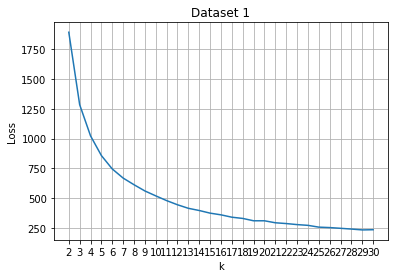

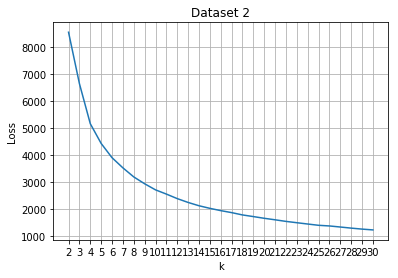

In [99]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid, loss1)
plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 1')
plt.grid()
# plt.savefig('../plots/pca_kmeans_loss_1.png')

plt.figure()
plt.plot(k_grid, loss2)
plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Dataset 2')
plt.grid()
# plt.savefig('../plots/pca_kmeans_loss_2.png')

In [100]:
# Choose the same number of clusters as in the case without PCA
k1 = 6
k2 = 6

In [101]:
# Run kmeans again with optimal k values
kmeans1 = KMeans(n_clusters=k1, random_state=random_seed, n_jobs=-1)
kmeans2 = KMeans(n_clusters=k2, random_state=random_seed, n_jobs=-1)
kmeans1.fit(X1_transform)
kmeans2.fit(X2_transform)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=7641, tol=0.0001, verbose=0)

### Evaluate quality of clusters

In [102]:
print ("<------------------------ Dataset 1 ------------------------>")
print('Inertia: ', kmeans1.inertia_)
score1 = silhouette_score(X1_transform, kmeans1.labels_)
print('Silhouette score: ', score1)
ami1 = adjusted_mutual_info_score(y1, kmeans1.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami1)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('Inertia: ', kmeans2.inertia_)
score2 = silhouette_score(X2_transform, kmeans2.labels_)
print('Silhouette score: ', score2)
ami2 = adjusted_mutual_info_score(y2, kmeans2.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami2)
print()

<------------------------ Dataset 1 ------------------------>
Inertia:  744.5667320116884
Silhouette score:  0.3340295207654367
Adjusted Mutual Information (AMI) score:  0.2901708059886514

<------------------------ Dataset 2 ------------------------>
Inertia:  3900.3328371730368


E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette score:  0.2970738185749419
Adjusted Mutual Information (AMI) score:  0.05008076625748718



E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### Visualization of clusters

## Comparison to clustering without PCA

In [12]:
k1_old = 9
k2_old = 9

In [13]:
kmeans1_old = KMeans(n_clusters=k1_old, random_state=random_seed, n_jobs=-1)
kmeans2_old = KMeans(n_clusters=k2_old, random_state=random_seed, n_jobs=-1)
kmeans1_old.fit(X1_transform)
kmeans2_old.fit(X2_transform)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=7641, tol=0.0001, verbose=0)

In [14]:
print ("<------------------------ Dataset 1 ------------------------>")
print('Inertia: ', kmeans1_old.inertia_)
score1_old = silhouette_score(X1_transform, kmeans1_old.labels_)
print('Silhouette score: ', score1_old)
ami1_old = adjusted_mutual_info_score(y1, kmeans1_old.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami1_old)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('Inertia: ', kmeans2_old.inertia_)
score2_old = silhouette_score(X2_transform, kmeans2_old.labels_)
print('Silhouette score: ', score2_old)
ami2_old = adjusted_mutual_info_score(y2, kmeans2_old.labels_)
print('Adjusted Mutual Information (AMI) score: ', ami2_old)
print()

<------------------------ Dataset 1 ------------------------>
Inertia:  5111.722668643821
Silhouette score:  0.1804686289020708
Adjusted Mutual Information (AMI) score:  0.22780436494690937

<------------------------ Dataset 2 ------------------------>
Inertia:  22544.146331770957


E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette score:  0.14161773954691903
Adjusted Mutual Information (AMI) score:  0.03262542619886474



E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


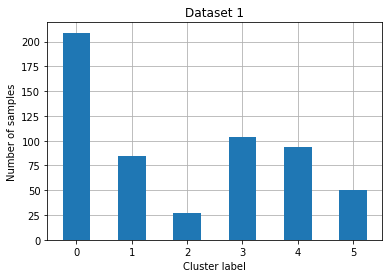

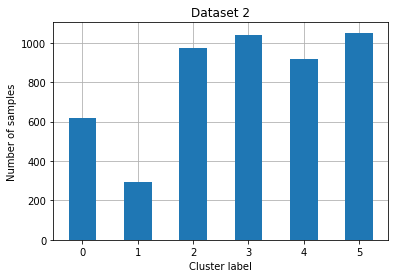

In [103]:
# Dataset 1
# plt.figure()
# plt.hist(kmeans1_old.labels_, bins=np.arange(0, k1_old + 1) - 0.5, rwidth=0.5, zorder=2)
# plt.xticks(np.arange(0, k1_old))
# plt.xlabel('Cluster label')
# plt.ylabel('Number of samples')
# plt.title('Dataset 1')
# plt.grid()
# # plt.savefig('../plots/pca_kmeans_hist_1.png')

# # Dataset 2
# plt.figure()
# plt.hist(kmeans2_old.labels_, bins=np.arange(0, k2_old + 1) - 0.5, rwidth=0.5, zorder=2)
# plt.xticks(np.arange(0, k2_old))
# plt.xlabel('Cluster label')
# plt.ylabel('Number of samples')
# plt.title('Dataset 2')
# plt.grid()
# plt.savefig('../plots/pca_kmeans_hist_2.png')

# Dataset 1
plt.figure()
plt.hist(kmeans1.labels_, bins=np.arange(0, k1 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k1))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1')
plt.grid()
# plt.savefig('../plots/pca_kmeans_hist_1.png')

# Dataset 2
plt.figure()
plt.hist(kmeans2.labels_, bins=np.arange(0, k2 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k2))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2')
plt.grid()
# plt.savefig('../plots/pca_kmeans_hist_2.png')

          0         1         2         3         4         5         6  \
0  1.097064  1.269934  0.984375  2.652874  2.532475  1.886690  2.303601   
1  1.829821  1.685955  1.908708 -0.023846  0.548144  1.805927  1.535126   
2  1.579888  1.566503  1.558884  1.363478  2.037231  1.511870  1.347475   
3 -0.768909 -0.592687 -0.764464  1.915897  1.451707 -0.281464 -0.249939   
4  1.750297  1.776573  1.826229  1.371011  1.428493  1.298575  1.338539   

          7         8  diagnosis  class  
0  2.001237  2.296076          1      8  
1  1.890489  1.087084          1      5  
2  1.456285  1.955000          1      5  
3 -0.550021  2.175786          1      8  
4  1.220724  0.729259          1      5  
          0         1         2  quality  class
0 -0.081770  2.331512 -1.393152        1      1
1  0.215896 -0.009154 -0.824276        1      6
2  0.017452  0.358665 -0.336667        1      8
3 -0.478657  0.525855 -0.499203        1      7
4 -0.478657  0.525855 -0.499203        1      7


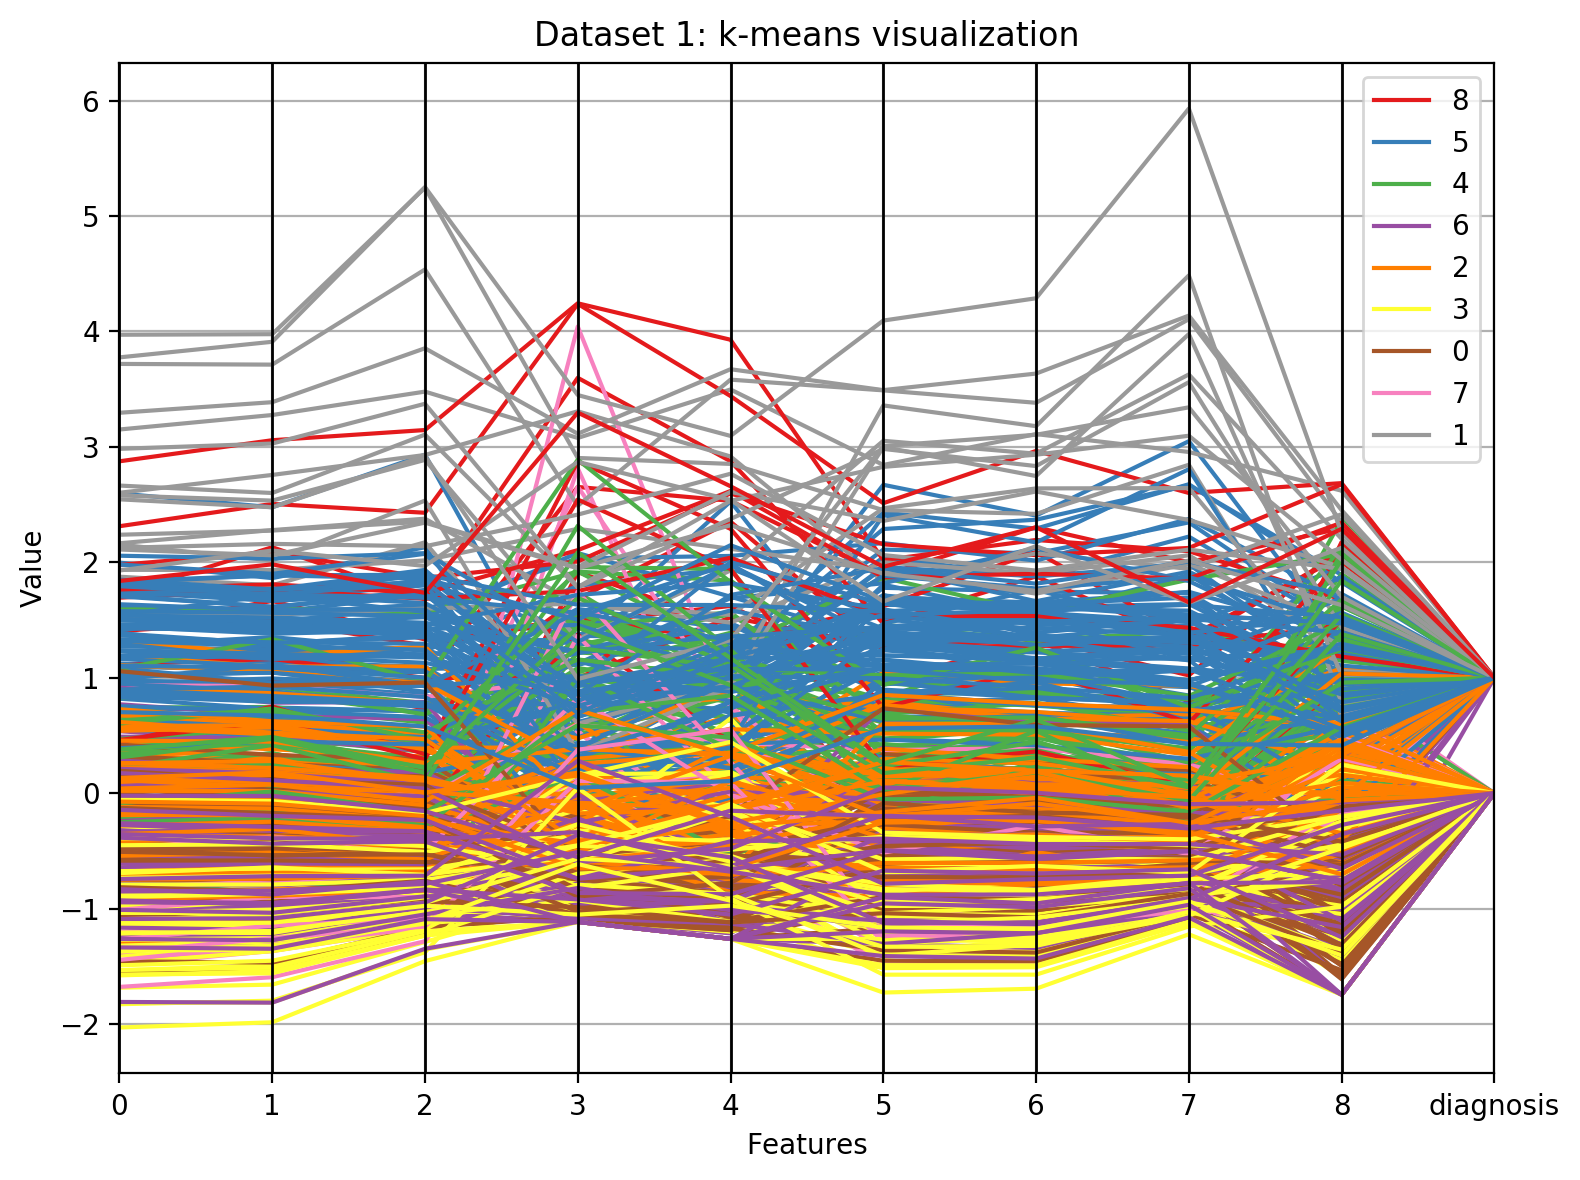

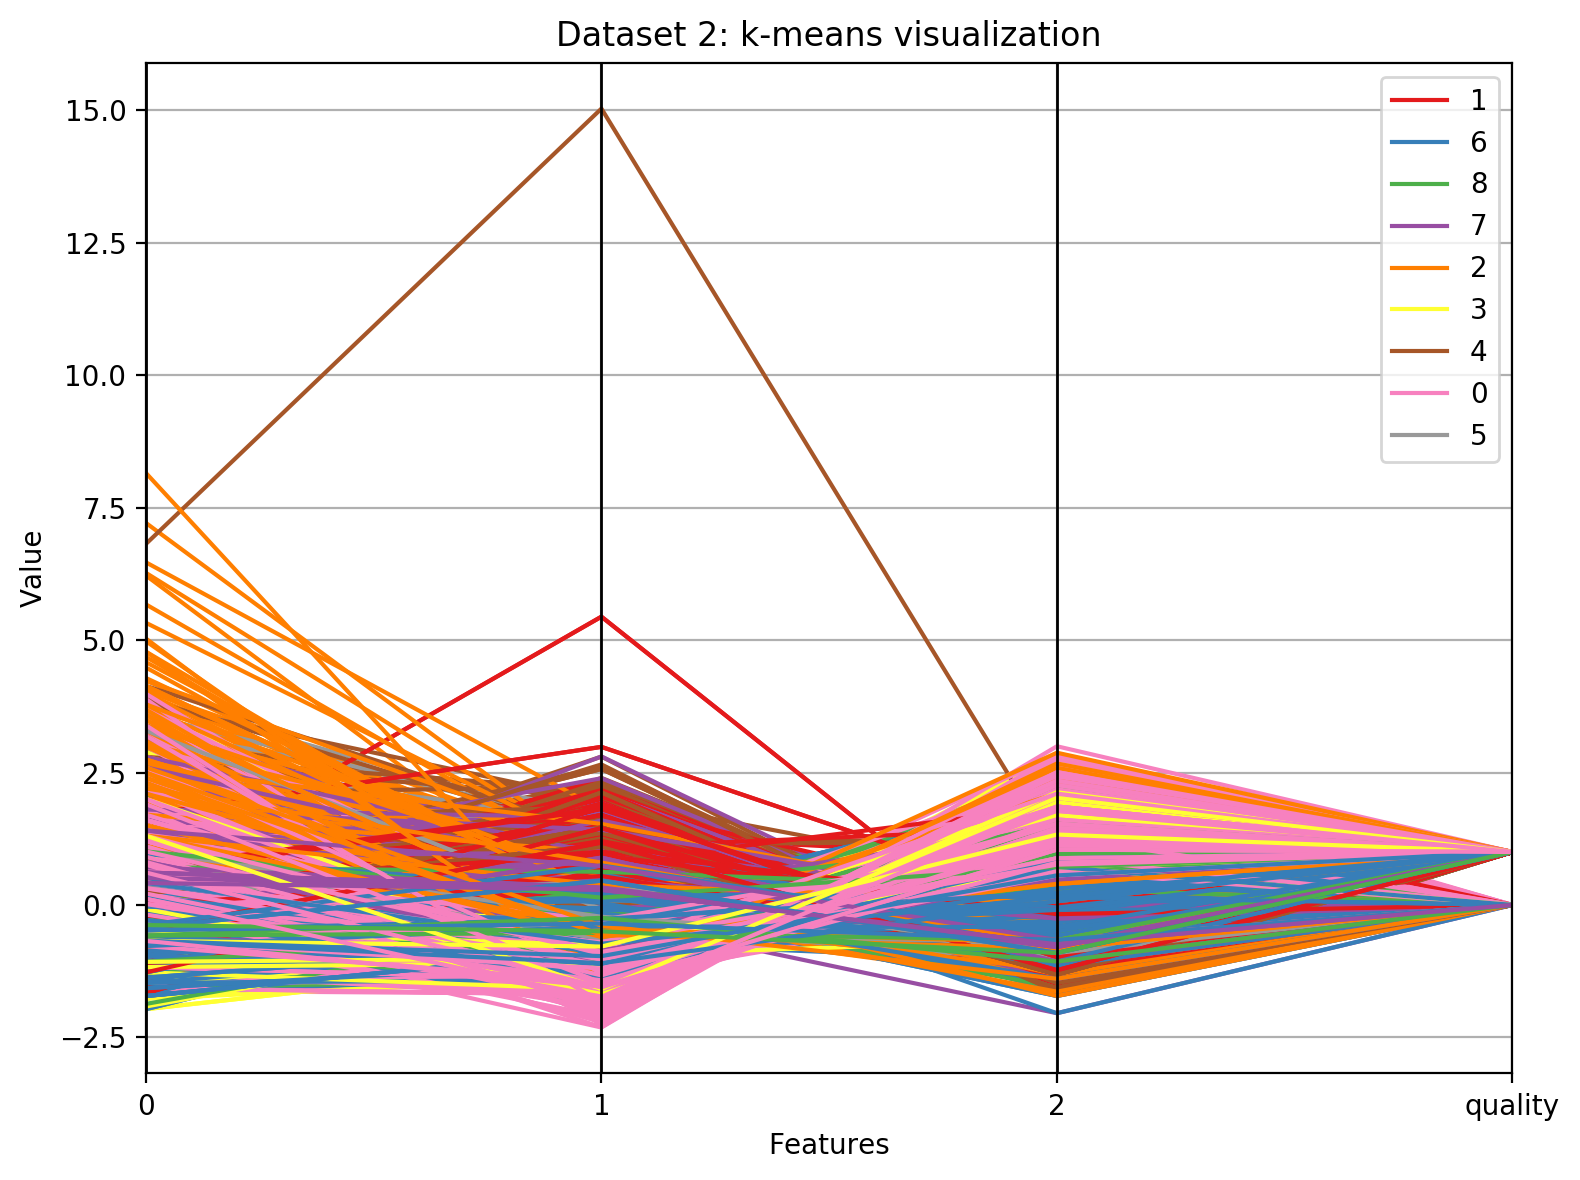

In [111]:
# Dataset 1
df1 = pd.DataFrame(X1_transform)
df1['diagnosis'] = y1
df1['class'] = kmeans1_old.labels_
print(df1.head(5))

plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df1, 'class', colormap='Set1')
# plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Dataset 1: k-means visualization')
plt.tight_layout()
# plt.savefig('../plots/pca_kmeans_viz_1.png')

# Dataset 2
df2 = pd.DataFrame(X2_transform)
df2['quality'] = y2
df2['class'] = kmeans2_old.labels_
print(df2.head(5))

plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df2, 'class', colormap='Set1')
# plt.xticks(rotation=30)
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Dataset 2: k-means visualization')
plt.tight_layout()
# plt.savefig('../plots/pca_kmeans_viz_2.png')

## GMM

In [105]:
# Find the optimal number of components using BIC
n_components_grid1 = np.arange(2, 31)
n_components_grid2 = np.arange(2, 51)
bic1 = np.zeros(n_components_grid1.size)
bic2 = np.zeros(n_components_grid2.size)

print ("<------------------------ Dataset 1 ------------------------>")
for idx, n_components in enumerate(n_components_grid1):
    print ("Number of components = ", n_components)
    gmm1 = GaussianMixture(n_components=n_components, random_state=random_seed)
    gmm1.fit(X1_transform)
    bic1[idx] = gmm1.bic(X1_transform)
print()
print ("<------------------------ Dataset 2 ------------------------>")
for idx, n_components in enumerate(n_components_grid2):
    print ("Number of components = ", n_components)
    gmm2 = GaussianMixture(n_components=n_components, random_state=random_seed)
    gmm2.fit(X2_transform)
    bic2[idx] = gmm2.bic(X2_transform)

<------------------------ Dataset 1 ------------------------>
Number of components =  2
Number of components =  3
Number of components =  4
Number of components =  5
Number of components =  6
Number of components =  7
Number of components =  8
Number of components =  9
Number of components =  10
Number of components =  11
Number of components =  12
Number of components =  13
Number of components =  14
Number of components =  15
Number of components =  16
Number of components =  17
Number of components =  18
Number of components =  19
Number of components =  20
Number of components =  21
Number of components =  22
Number of components =  23
Number of components =  24
Number of components =  25
Number of components =  26
Number of components =  27
Number of components =  28
Number of components =  29
Number of components =  30

<------------------------ Dataset 2 ------------------------>
Number of components =  2
Number of components =  3
Number of components =  4
Number of components =

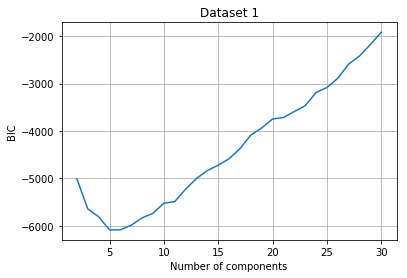

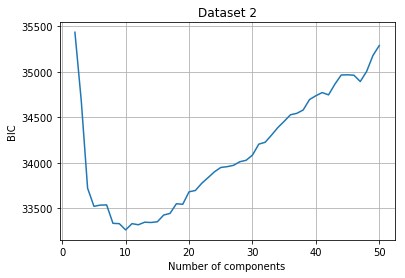

In [106]:
# Plot BIC vs number of components
plt.figure()
plt.plot(n_components_grid1, bic1)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 1')
plt.grid()
# plt.savefig('../plots/pca_gmm_bic_1.png')

plt.figure()
plt.plot(n_components_grid2, bic2)
# plt.xticks(k_grid)
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('Dataset 2')
plt.grid()
# plt.savefig('../plots/pca_gmm_bic_2.png')

In [107]:
n_best_1 = n_components_grid1[np.argmin(bic1)]
print('Optimal number of components for dataset 1: ', n_best_1)
n_best_2 = n_components_grid2[np.argmin(bic2)]
print('Optimal number of components for dataset 2: ', n_best_2)

Optimal number of components for dataset 1:  5
Optimal number of components for dataset 2:  10


In [108]:
# Run GMM-EM again with the optimal number of components
gmm1 = GaussianMixture(n_components=n_best_1, random_state=random_seed)
gmm2 = GaussianMixture(n_components=n_best_2, random_state=random_seed)
gmm1.fit(X1_transform)
gmm_labels1 = gmm1.predict(X1_transform)
gmm2.fit(X2_transform)
gmm_labels2 = gmm2.predict(X2_transform)

### Evaluate quality of clusters

In [109]:
print ("<------------------------ Dataset 1 ------------------------>")
print('BIC: ', gmm1.bic(X1_transform))
score1_gmm = silhouette_score(X1_transform, gmm_labels1)
print('Silhouette score: ', score1_gmm)
ami1_gmm = adjusted_mutual_info_score(y1, gmm_labels1)
print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('BIC: ', gmm2.bic(X2_transform))
score2_gmm = silhouette_score(X2_transform, gmm_labels2)
print('Silhouette score: ', score2_gmm)
ami2_gmm = adjusted_mutual_info_score(y2, gmm_labels2)
print('Adjusted Mutual Information (AMI) score: ', ami2_gmm)
print()

<------------------------ Dataset 1 ------------------------>
BIC:  -6085.74192494296
Silhouette score:  0.2411239962194243
Adjusted Mutual Information (AMI) score:  0.30555344236077053

<------------------------ Dataset 2 ------------------------>
BIC:  33263.65832507753


E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette score:  0.23891231904583443
Adjusted Mutual Information (AMI) score:  0.04428619017644726



E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### Visualization of clusters

          0         1         2         3         4         5         6  \
0  1.097064  1.269934  0.984375  2.652874  2.532475  1.886690  2.303601   
1  1.829821  1.685955  1.908708 -0.023846  0.548144  1.805927  1.535126   
2  1.579888  1.566503  1.558884  1.363478  2.037231  1.511870  1.347475   
3 -0.768909 -0.592687 -0.764464  1.915897  1.451707 -0.281464 -0.249939   
4  1.750297  1.776573  1.826229  1.371011  1.428493  1.298575  1.338539   

          7         8  diagnosis  class  
0  2.001237  2.296076          1      2  
1  1.890489  1.087084          1      2  
2  1.456285  1.955000          1      1  
3 -0.550021  2.175786          1      4  
4  1.220724  0.729259          1      1  
          0         1         2  diagnosis  class
0 -0.081770  2.331512 -1.393152          1      1
1  0.215896 -0.009154 -0.824276          1      7
2  0.017452  0.358665 -0.336667          1      7
3 -0.478657  0.525855 -0.499203          1      7
4 -0.478657  0.525855 -0.499203          1     

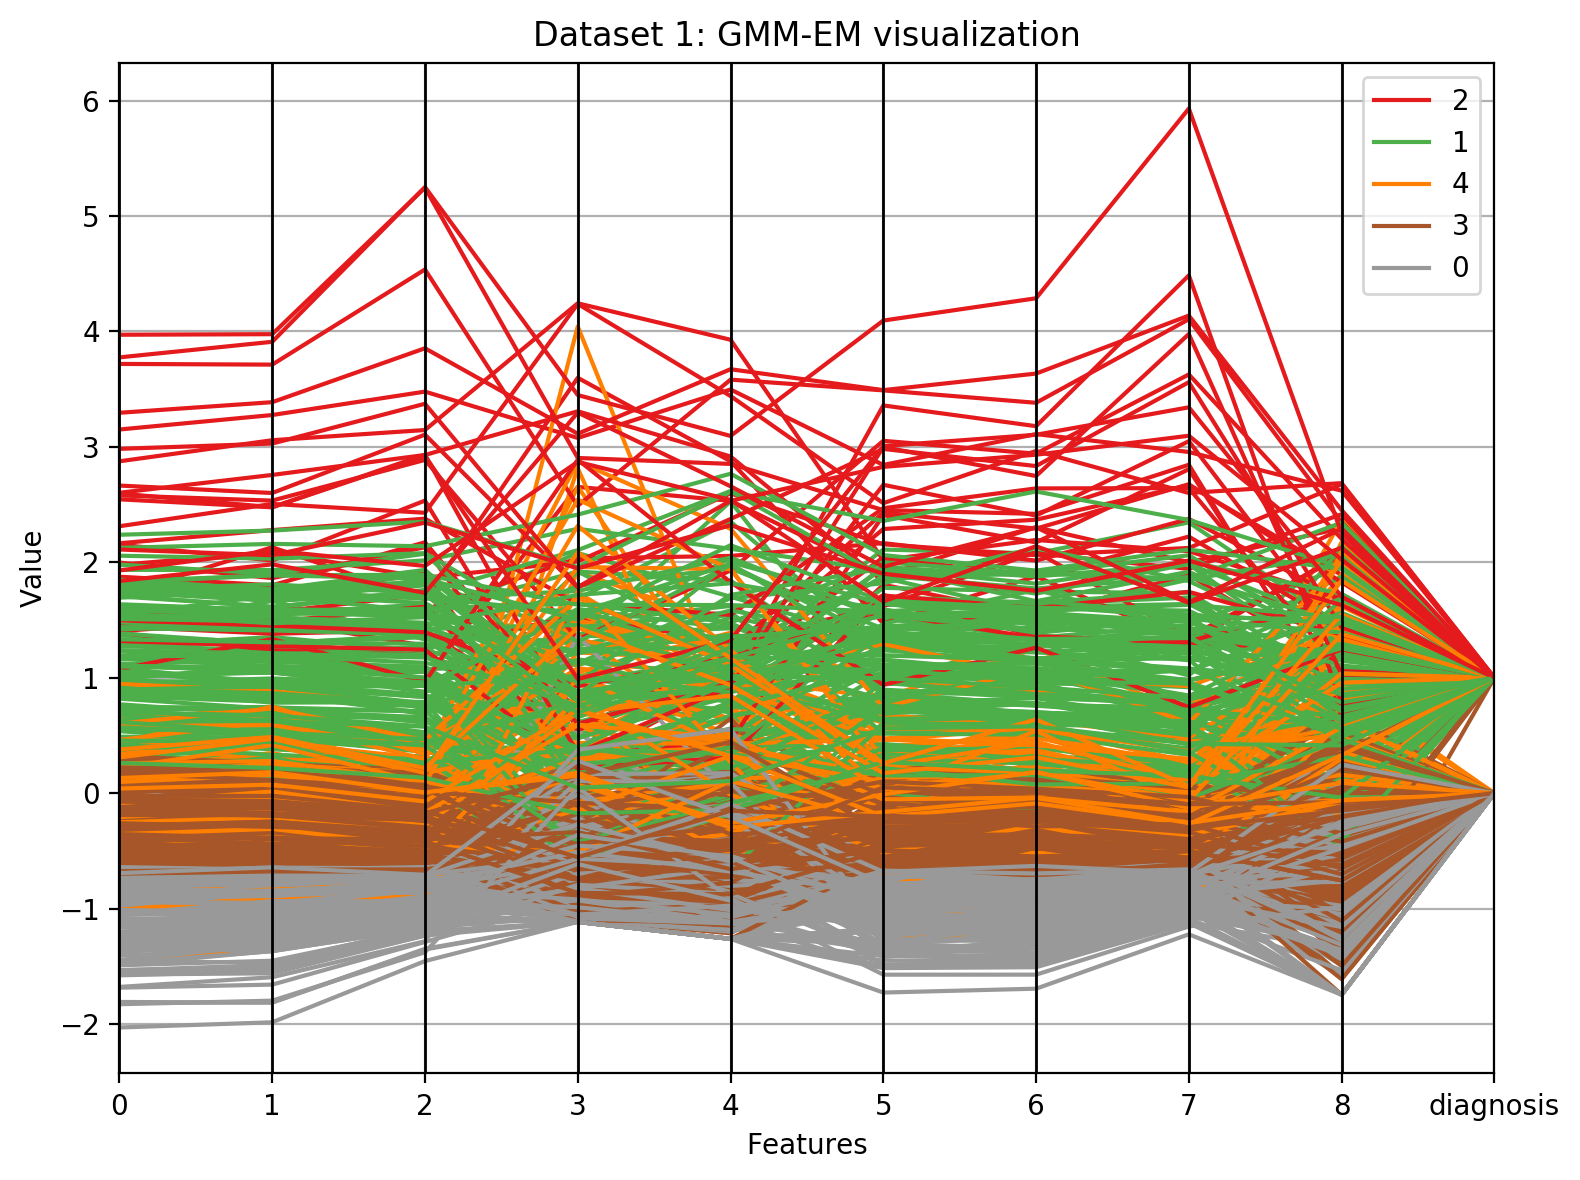

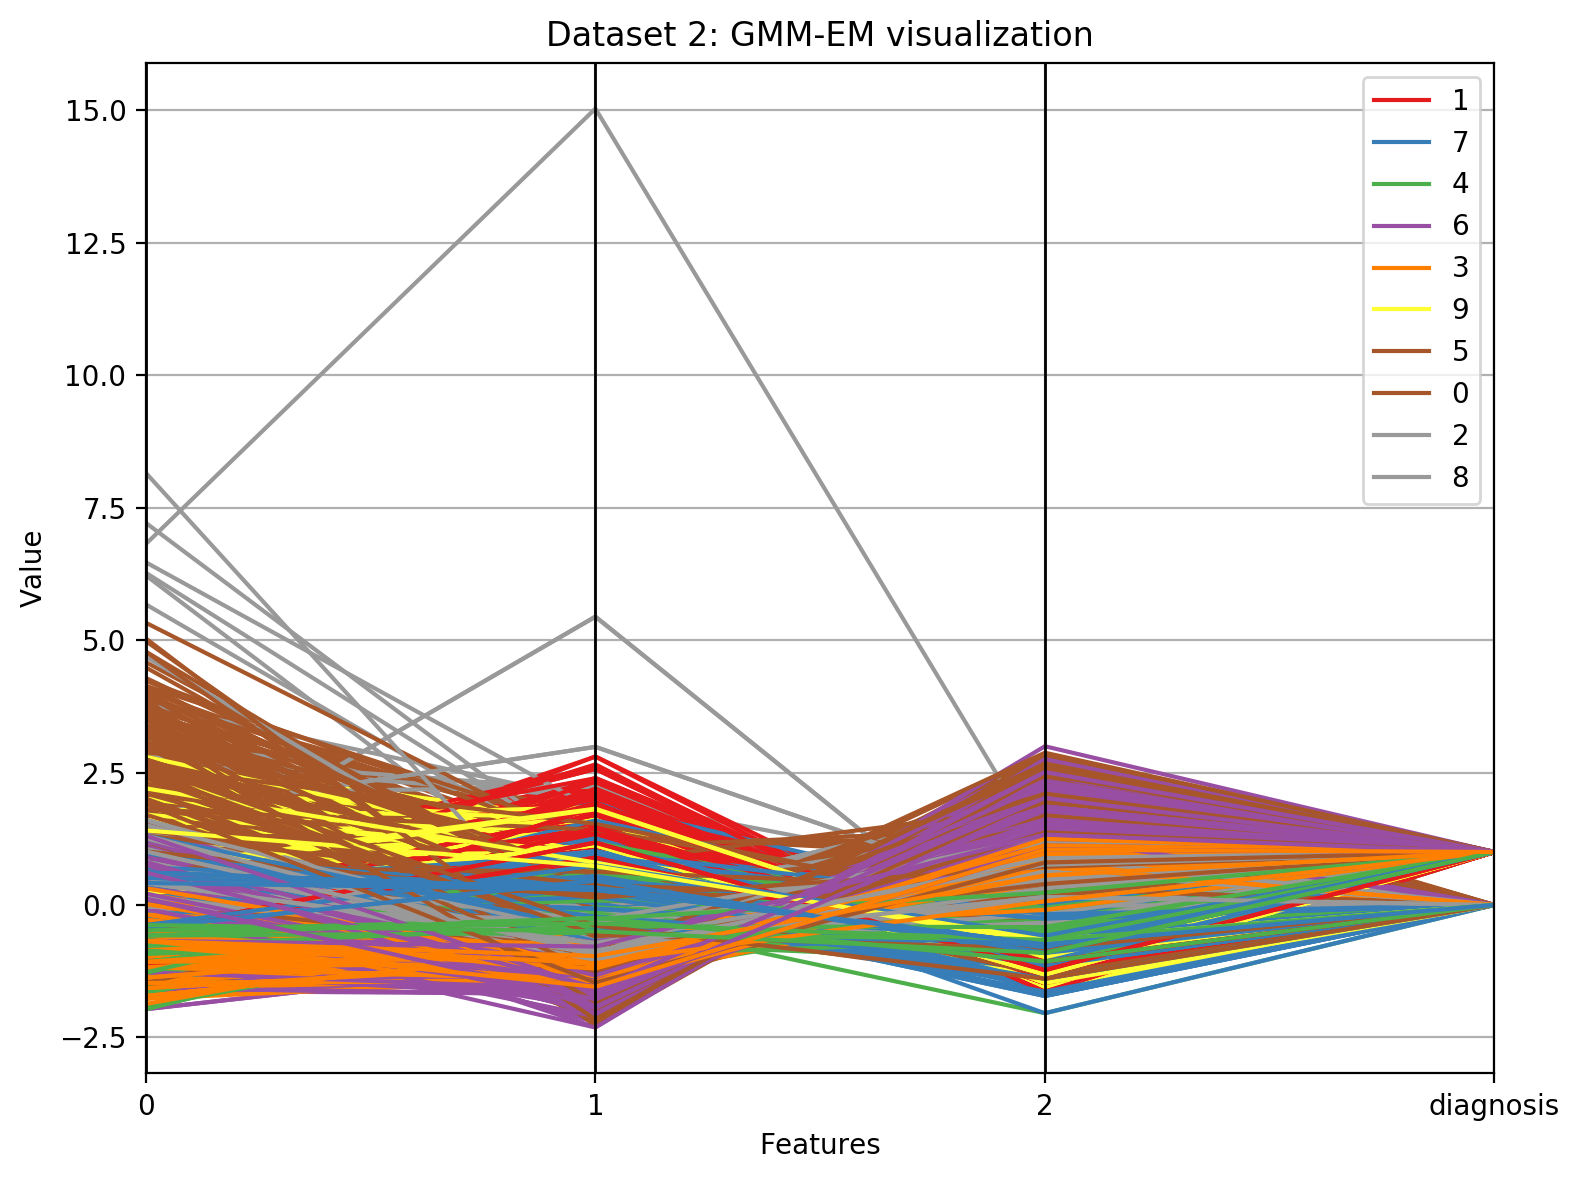

In [112]:
# Dataset 1
df1_gmm = pd.DataFrame(X1_transform)
df1_gmm['diagnosis'] = y1
df1_gmm['class'] = gmm_labels1
print(df1_gmm.head(5))

plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df1_gmm, 'class', colormap='Set1')
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Dataset 1: GMM-EM visualization')
plt.tight_layout()
# plt.savefig('../plots/pca_gmm_viz_1.png')

# Dataset 2
df2_gmm = pd.DataFrame(X2_transform)
df2_gmm['diagnosis'] = y2
df2_gmm['class'] = gmm_labels2
print(df2_gmm.head(5))

plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df2_gmm, 'class', colormap='Set1')
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Dataset 2: GMM-EM visualization')
plt.tight_layout()
# plt.savefig('../plots/pca_gmm_viz_2.png')

### Comparison to clustering without PCA

In [23]:
n_gmm_1 = 5
n_gmm_2 = 17

In [24]:
gmm1 = GaussianMixture(n_components=n_gmm_1, random_state=random_seed)
gmm2 = GaussianMixture(n_components=n_gmm_2, random_state=random_seed)
gmm1.fit(X1_transform)
gmm_labels1 = gmm1.predict(X1_transform)
gmm2.fit(X2_transform)
gmm_labels2 = gmm2.predict(X2_transform)

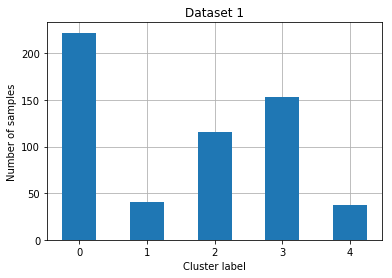

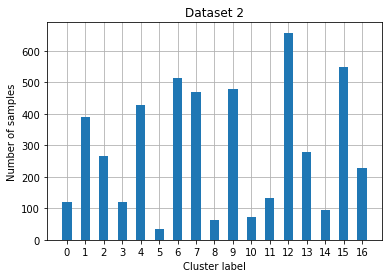

In [25]:
# Dataset 1
plt.figure()
plt.hist(gmm_labels1, bins=np.arange(0, n_gmm_1 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, n_gmm_1))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 1')
plt.grid()
# plt.savefig('../plots/pca_gmm_hist_1.png')

# Dataset 2
plt.figure()
plt.hist(gmm_labels2, bins=np.arange(0, n_gmm_2 + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, n_gmm_2))
plt.xlabel('Cluster label')
plt.ylabel('Number of samples')
plt.title('Dataset 2')
plt.grid()
# plt.savefig('../plots/pca_gmm_hist_2.png')

In [26]:
print ("<------------------------ Dataset 1 ------------------------>")
print('BIC: ', gmm1.bic(X1_transform))
score1_gmm = silhouette_score(X1_transform, gmm_labels1)
print('Silhouette score: ', score1_gmm)
ami1_gmm = adjusted_mutual_info_score(y1, gmm_labels1)
print('Adjusted Mutual Information (AMI) score: ', ami1_gmm)
print()
print ("<------------------------ Dataset 2 ------------------------>")
print('BIC: ', gmm2.bic(X2_transform))
score2_gmm = silhouette_score(X2_transform, gmm_labels2)
print('Silhouette score: ', score2_gmm)
ami2_gmm = adjusted_mutual_info_score(y2, gmm_labels2)
print('Adjusted Mutual Information (AMI) score: ', ami2_gmm)
print()

<------------------------ Dataset 1 ------------------------>
BIC:  12984.066439220744
Silhouette score:  0.15485717630181545
Adjusted Mutual Information (AMI) score:  0.29268694064210016

<------------------------ Dataset 2 ------------------------>
BIC:  95844.24866538834


E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette score:  0.03443523979009745
Adjusted Mutual Information (AMI) score:  0.028913626443432552



E:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


          0          1         2         3         4         5  diagnosis  \
0  9.192837   1.948583 -1.123166  3.633731 -1.195110  1.411424          1   
1  2.387802  -3.768172 -0.529293  1.118264  0.621775  0.028659          1   
2  5.733896  -1.075174 -0.551748  0.912082 -0.177086  0.541447          1   
3  7.122953  10.275589 -3.232789  0.152547 -2.960879  3.053416          1   
4  3.935302  -1.948072  1.389767  2.940639  0.546748 -1.226494          1   

   class  
0      4  
1      3  
2      3  
3      4  
4      3  
          0         1         2         3         4         5         6  \
0  3.676944 -0.545233 -0.930422 -1.135374 -0.292855 -0.891620  0.204664   
1 -0.644588  0.430770 -0.356331  0.999117 -0.714078 -0.483738  0.436998   
2  0.155291 -1.189800 -0.017532  0.270219 -0.367706 -0.500682  0.554319   
3  1.455374  0.099680 -0.001956 -0.423022 -0.469981  0.769261 -0.197702   
4  1.455374  0.099680 -0.001956 -0.423022 -0.469981  0.769261 -0.197702   

   diagnosis  class 

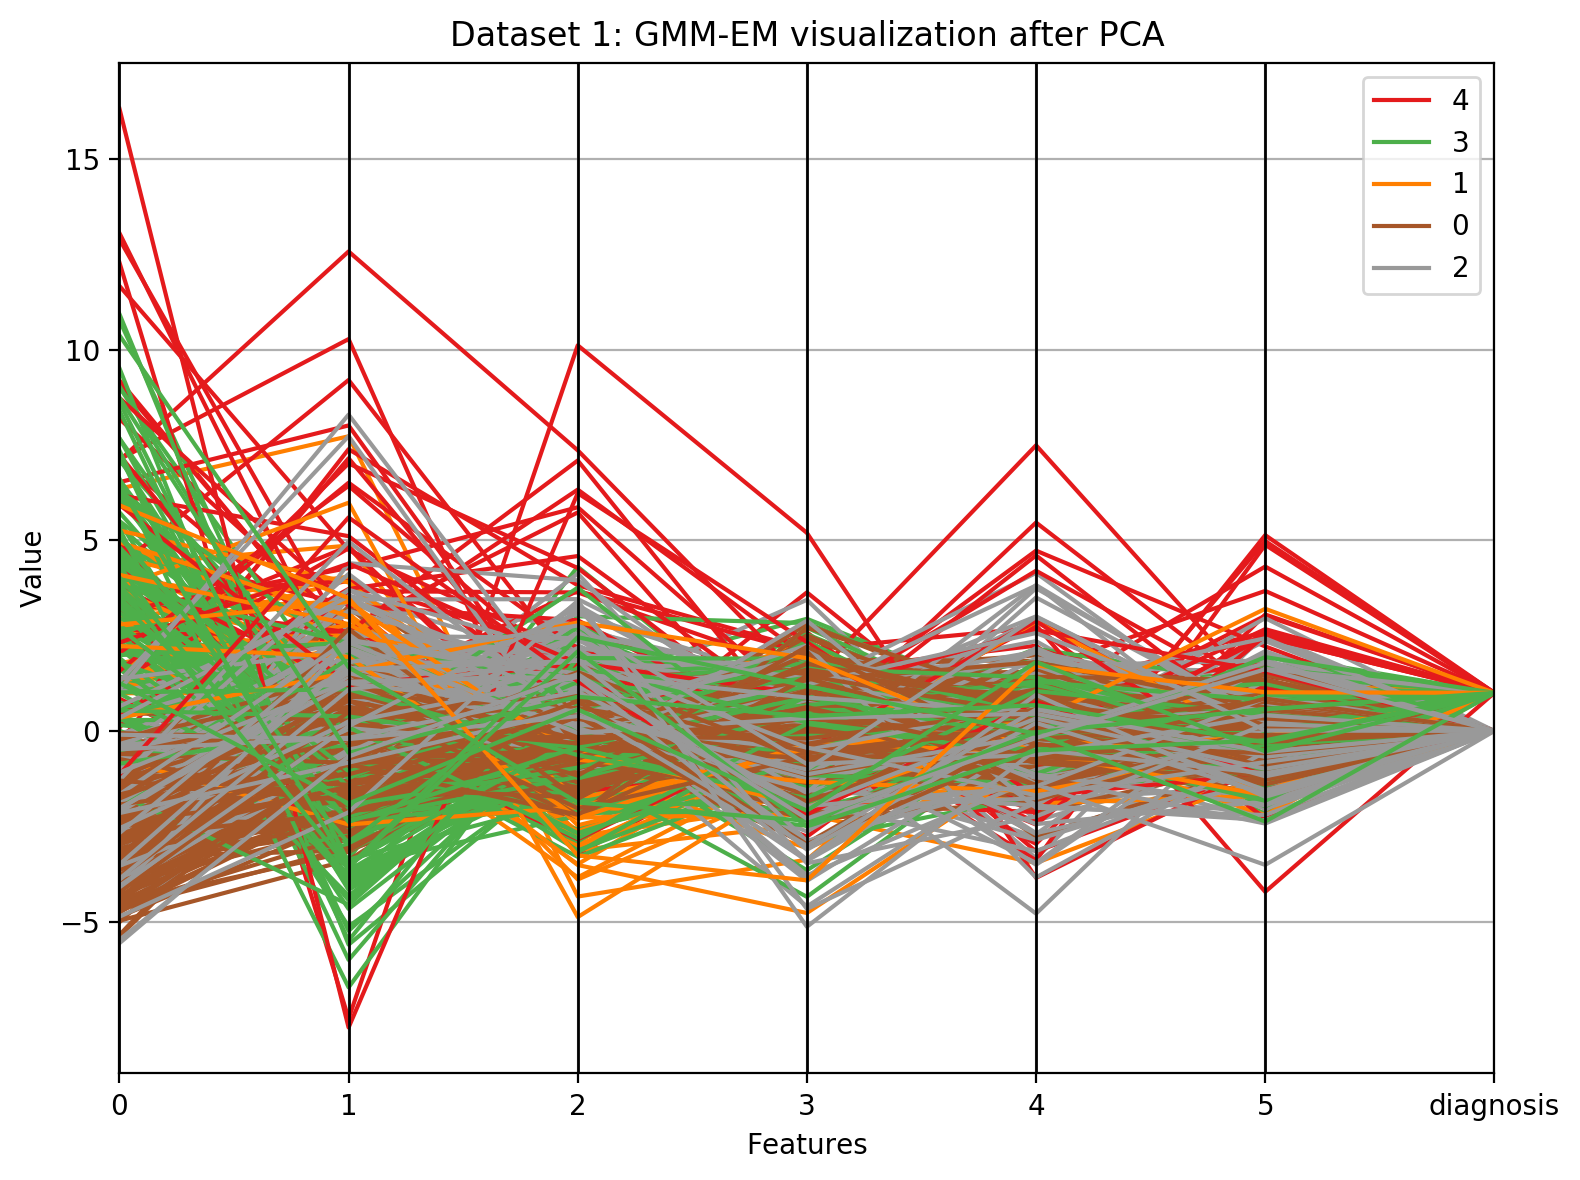

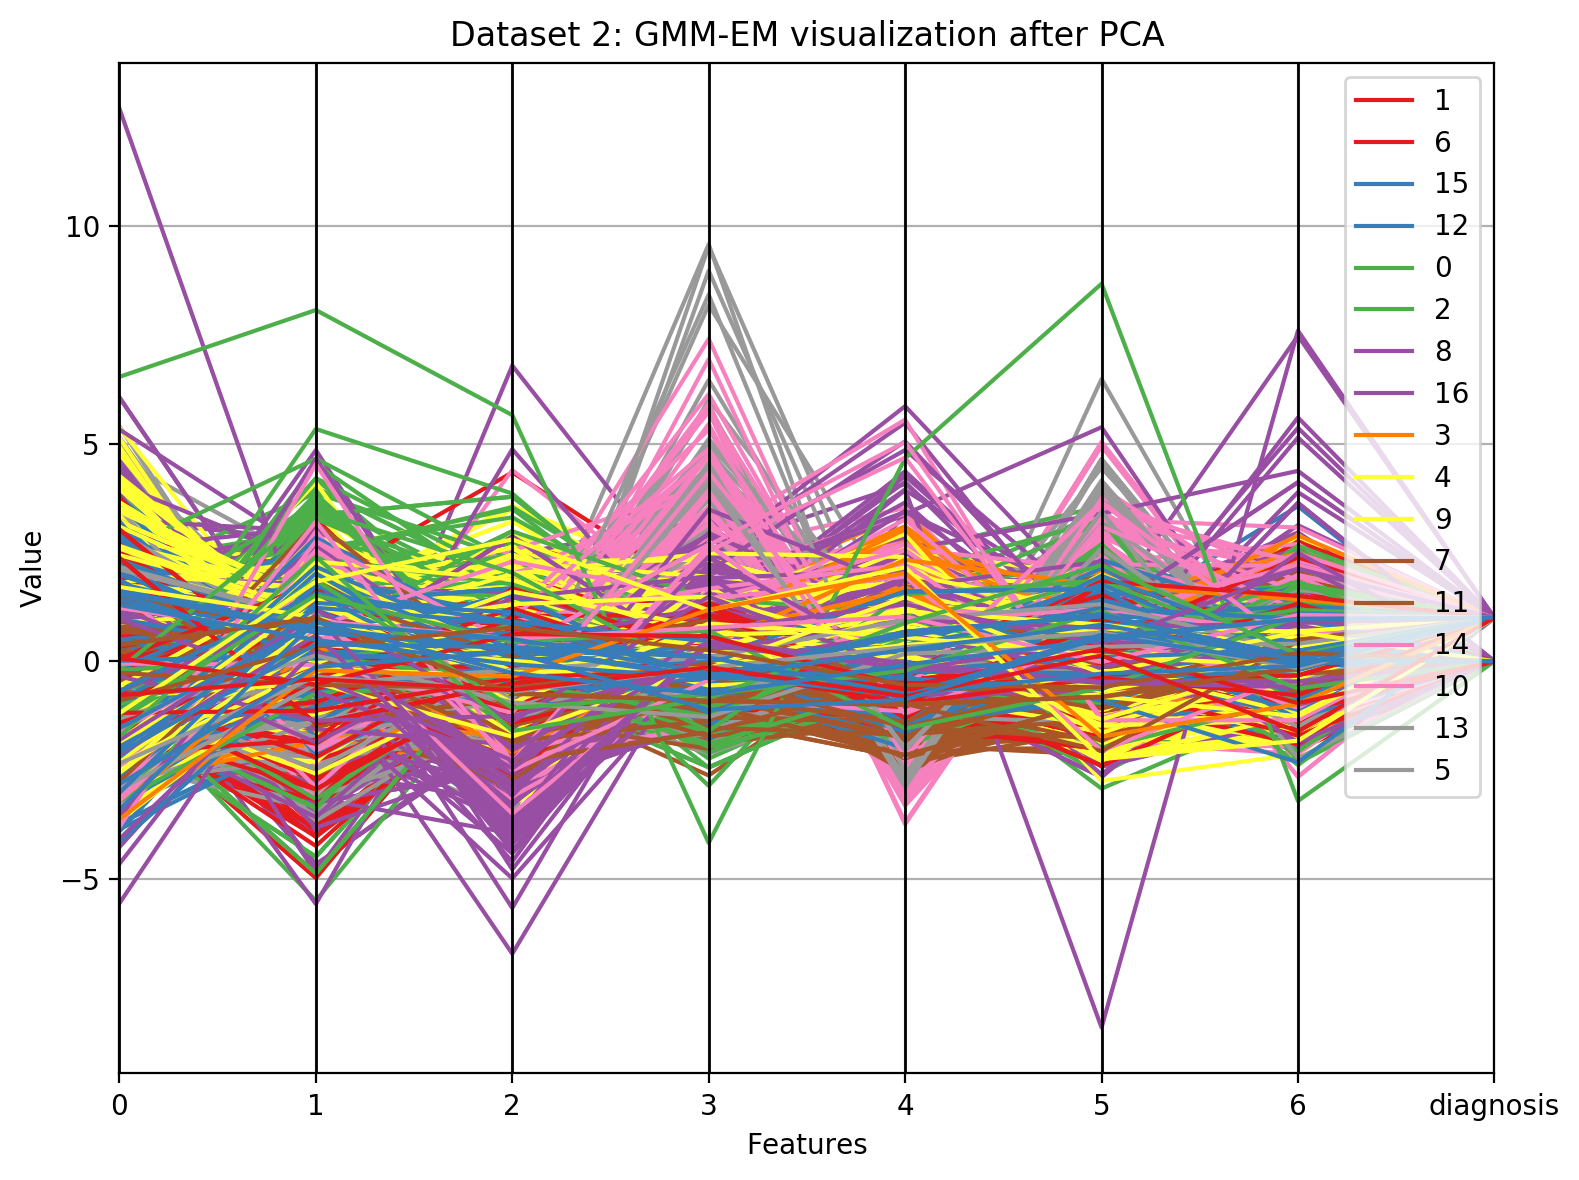

In [27]:
# Dataset 1
df1_gmm = pd.DataFrame(X1_transform)
df1_gmm['diagnosis'] = y1
df1_gmm['class'] = gmm_labels1
print(df1_gmm.head(5))

plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df1_gmm, 'class', colormap='Set1')
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Dataset 1: GMM-EM visualization after PCA')
plt.tight_layout()
# plt.savefig('../plots/pca_gmm_comp_viz_1.png')

# Dataset 2
df2_gmm = pd.DataFrame(X2_transform)
df2_gmm['diagnosis'] = y2
df2_gmm['class'] = gmm_labels2
print(df2_gmm.head(5))

plt.figure(figsize=(8, 6), dpi=200)
pd.plotting.parallel_coordinates(df2_gmm, 'class', colormap='Set1')
plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Dataset 2: GMM-EM visualization after PCA')
plt.tight_layout()
# plt.savefig('../plots/pca_gmm_comp_viz_2.png')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

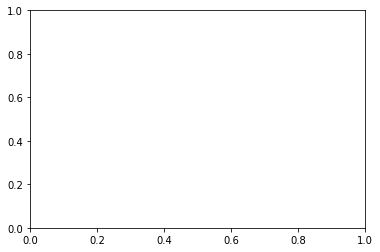

In [71]:
plt.figure()
plt.barh(np.arange(n_gmm_1), gmm1.weights_, zorder=2)
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.title('Dataset 1')
plt.xlabel('Weight')
plt.grid()
# plt.savefig('../plots/pca_gmm_wts_1.png')

plt.figure()
plt.barh(np.arange(n_gmm_2), gmm2.weights_, zorder=2)
plt.gca().set_yticks(np.arange(n_gmm_2))
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.title('Dataset 2')
plt.xlabel('Weight')
plt.grid()
# plt.savefig('../plots/pca_gmm_wts_2.png')

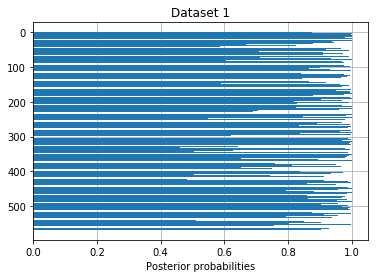

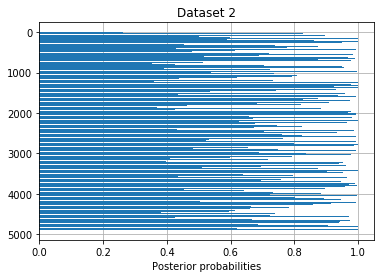

In [29]:
probs1 = np.amax(gmm1.predict_proba(X1_transform), axis=1)
plt.figure()
plt.barh(np.arange(X1_transform.shape[0]), probs1, zorder=2)
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.title('Dataset 1')
plt.xlabel('Posterior probabilities')
plt.grid()
# plt.savefig('../plots/pca_gmm_probs_1.png')

probs2 = np.amax(gmm2.predict_proba(X2_transform), axis=1)
plt.figure()
plt.barh(np.arange(X2_transform.shape[0]), probs2, zorder=2)
plt.gca().invert_yaxis()  # labels read top-to-bottom
plt.title('Dataset 2')
plt.xlabel('Posterior probabilities')
plt.grid()
# plt.savefig('../plots/pca_gmm_probs_2.png')